In [19]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns

%matplotlib inline

In [61]:
import csv
import pandas as pd
import numpy as np
from tqdm import tqdm
import GEOparse as gp
import os
from collections import Counter, defaultdict

datadirectory = '../data/apis_series/series/'
files = []
for dirpath, dirnames, filenames in os.walk(datadirectory):
    for filename in (f for f in filenames if f.endswith(".soft.gz")):
        files.append(os.path.join(dirpath, filename))

In [3]:
def gene_set():
    gene_lists = defaultdict(set)
    for f in tqdm(files):
        gse = gp.get_GEO(filepath=f, silent=True)
        for gsm_name, gsm in gse.gsms.items():
            if not gsm.table.empty:
                glist = gsm.table.iloc[:,0].tolist()
                if any(isinstance(c, int) for c in glist):
                    break
                gene_lists[gsm_name].update(glist)
    return gene_lists


In [5]:
genes = gene_set()

100%|██████████| 70/70 [05:16<00:00,  2.89it/s]


In [6]:
all_genes = Counter()
for k in genes.values():
    for c in k:
        all_genes[c] += 1

In [7]:
len(all_genes)

10804259

Text(0, 0.5, 'Number of genes')

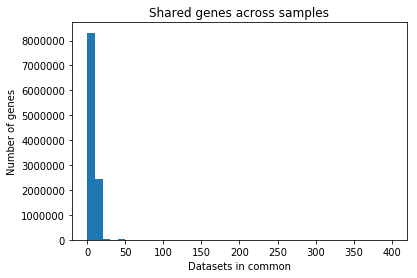

In [25]:
fig = plt.hist(all_genes.values(), bins=40, range=(0,400))
plt.title("Shared genes across samples")
plt.xlabel("Datasets in common")
plt.ylabel("Number of genes")

Text(0, 0.5, 'Number of genes')

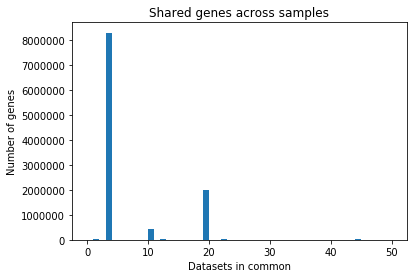

In [26]:
plt.hist(all_genes.values(), bins=50, range=(0,50))
plt.title("Shared genes across samples")
plt.xlabel("Datasets in common")
plt.ylabel("Number of genes")

Text(0, 0.5, 'Number of genes')

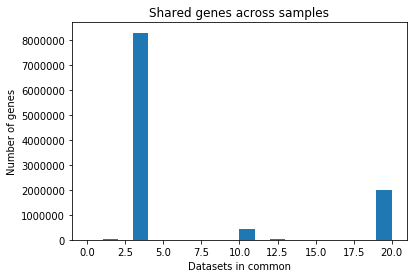

In [33]:
plt.hist(all_genes.values(), bins=20, range=(0,20))
plt.title("Shared genes across samples")
plt.xlabel("Datasets in common")
plt.ylabel("Number of genes")

In [34]:
genes_3 = [c for c in all_genes.items() if c[1] == 3]

In [48]:
genes_3[:5]

[('CM000063FS008065472', 3),
 ('CH877218FS000002636', 3),
 ('CM000059FS001816901', 3),
 ('CM000063FS006342682', 3),
 ('CM000054FS011450533', 3)]

In [39]:
samples_for_gene = dict(s for s in genes.items() if 'CM000063FS008065472' in s[1])

In [41]:
samples_for_gene.keys()

dict_keys(['GSM624782', 'GSM624786', 'GSM624790'])

In [49]:
genes['GSM624782']

{'CM000063FS008065472',
 'CH877218FS000002636',
 'CM000059FS001816901',
 'CM000063FS006342682',
 'CM000054FS011450533',
 'CM000065FS001779148',
 'AARF01000313FS000000766',
 'CM000058FS009753982',
 'CM000067FS009759483',
 'CM000065FS001631635',
 'CH876979FS000022600',
 'CH980872FS000011327',
 'CM000063FS003868231',
 'CM000054FS029224066',
 'CM000055FS008424380',
 'CM000055FS014956069',
 'CM000058FS001198438',
 'CM000060FS002056791',
 'CM000054FS028487423',
 'CH980720FS000022617',
 'CM000065FS004962906',
 'CM000059FS006937020',
 'CH980652FS000045478',
 'CH877139FS000008279',
 'AARF01000497FS000003315',
 'CH878026FS000008990',
 'CM000056FS010526956',
 'CM000062FS002914460',
 'CM000066FS007337804',
 'CM000057FS002291737',
 'CH980828FS000034920',
 'CH980982FS000011452',
 'CM000055FS008527518',
 'CM000064FS006698173',
 'CM000063FS003705411',
 'CM000068FS003357246',
 'CM000062FS009294349',
 'CM000060FS000408024',
 'CM000055FS005554348',
 'CH980663FS000040867',
 'CM000063FS000236204',
 'CM0000

In [50]:
gsm = gp.get_GEO('GSM624782', silent=True)

In [51]:
gsm.metadata

{'title': ['Control vs Nosema ceranae (Sample1_chip1)'],
 'geo_accession': ['GSM624782'],
 'status': ['Public on May 23 2012'],
 'submission_date': ['Nov 17 2010'],
 'last_update_date': ['Jun 25 2012'],
 'type': ['RNA'],
 'channel_count': ['2'],
 'source_name_ch1': ['Total RNA from gut ventriculi infected with Nosema ceranae'],
 'organism_ch1': ['Apis mellifera'],
 'taxid_ch1': ['7460'],
 'characteristics_ch1': ['tissue: gut ventriculi',
  'infection: Nosema ceranae',
  'replicate: biological'],
 'molecule_ch1': ['total RNA'],
 'extract_protocol_ch1': ['Total RNA extracted using organic solvents from gut ventriculi infected with Nosema ceranae. Total RNA amplified using MessageAmp II aRNA Kit (Ambion). aRNA converted to ds cDNA using SuperScript cDNA Synthesis Kit (Invitrogen).'],
 'label_ch1': ['Cy3'],
 'label_protocol_ch1': ['Labeled 1 microgram double stranded cDNA with Cy-dye nonamers in triplicate using NimbleGen Dual-Color Labeing kit with recommened user guide. Http://www.nimble

In [52]:
gsm.metadata['series_id']

['GSE25455']

In [53]:
gse = gp.get_GEO("GSE25455", silent=True)

In [60]:
all(k for k in samples_for_gene.keys() if k in gse.metadata['sample_id'])

True

## exploring samples

In [42]:
all_genes['Project01_Read1_101_rc']

379

In [118]:
f = '../data/apis_series/series/GSE121nnn/GSE121885/soft/GSE121885_family.soft.gz'
gse = gp.get_GEO(filepath=f, silent=True)

In [119]:
gsm = list(gse.gsms.values())[0]
gsm.table.empty

True

In [122]:
gse.show_metadata()

!Series_title = Transcriptomic responses to diet quality and viral infection in Apis mellifera
!Series_geo_accession = GSE121885
!Series_status = Public on Oct 30 2018
!Series_submission_date = Oct 29 2018
!Series_last_update_date = Oct 30 2018
!Series_summary = Purpose: Parts of Europe and the United States have witnessed dramatic losses in commercially managed honey bees over the past decade to what is considered an unsustainable extent. The large-scale loss of honey bees has considerable implications for the agricultural economy because honey bees are one of the leading pollinators of numerous crops. Honey bee declines have been associated with several interactive factors. Poor nutrition and viral infection are two environmental stressors that pose heightened dangers to honey bee health.
!Series_summary = Methods: We used RNA-sequencing to examine how monofloral diets (Rockrose and Chestnut) and Israeli acute paralysis virus inoculation influence gene expression patterns in honey be

In [131]:
!wget ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE121nnn/GSE121885/suppl/GSE121885_processedData.txt.gz

--2018-11-11 20:44:02--  ftp://ftp.ncbi.nlm.nih.gov/geo/series/GSE121nnn/GSE121885/suppl/GSE121885_processedData.txt.gz
           => ‘GSE121885_processedData.txt.gz’
Resolving ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)... 130.14.250.7, 2607:f220:41e:250::12
Connecting to ftp.ncbi.nlm.nih.gov (ftp.ncbi.nlm.nih.gov)|130.14.250.7|:21... connected.
Logging in as anonymous ... Logged in!
==> SYST ... done.    ==> PWD ... done.
==> TYPE I ... done.  ==> CWD (1) /geo/series/GSE121nnn/GSE121885/suppl ... done.
==> SIZE GSE121885_processedData.txt.gz ... 462697
==> PASV ... done.    ==> RETR GSE121885_processedData.txt.gz ... done.
Length: 462697 (452K) (unauthoritative)

GSE121885_processed 100%[===================>] 451.85K  --.-KB/s    in 0.02s   

2018-11-11 20:44:03 (23.9 MB/s) - ‘GSE121885_processedData.txt.gz’ saved [462697]



In [133]:
!zcat GSE121885_processedData.txt.gz|head

ID	NC.1	NC.2	NC.3	NC.4	NC.5	NC.6	NR.1	NR.2	NR.3	NR.4	NR.5	NR.6	VC.1	VC.2	VC.3	VC.4	VC.5	VC.6	VR.1	VR.2	VR.3	VR.4	VR.5	VR.6
GB40001	0	0	0	0	0	1	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1
GB40002	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
GB40003	0	0	3	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	1	0	0
GB40004	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0	0
GB40005	3	4	1	5	7	0	10	0	4	1	0	1	23	13	1	7	2	5	1	11	7	22	5	15
GB40006	11	11	36	30	9	25	11	8	8	12	10	22	239	150	13	31	22	30	25	753	371	426	10	690
GB40007	114	187	487	519	213	288	134	24	193	139	53	129	68	73	356	501	124	753	245	88	108	237	177	76
GB40008	1620	1527	1971	2325	1256	994	943	345	474	1066	867	955	903	830	2344	2591	1773	2701	1360	458	721	1046	1178	396
GB40009	462	2149	751	801	717	544	450	76	1152	417	589	363	258	387	1436	926	880	1286	1174	307	401	463	716	188

gzip: stdout: Broken pipe
